# Titanic Survivor Prediction Notebook

### 1. Data Preparation

In [121]:
# import relevant packages
import os
import numpy as np
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [122]:
# change working directory and load data
path = r"/Users/jonasschroeder/OneDrive - MTP-Marketing zwischen Theorie und Praxis e. V/Python/Kaggle/Titanic Competition"
os.chdir(path)

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [123]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
# TRAINING DATA

# Rename class
train_df["Pclass"].replace(1, "Upper", inplace=True)
train_df["Pclass"].replace(2, "Middle", inplace=True)
train_df["Pclass"].replace(3, "Lower", inplace=True)

# Replace missing age with median -> age inference method?
train_df["Age"].fillna(np.nanmedian(train_df["Age"]), inplace=True)

# Create Age Bands (thinner age bands didn't improve the model)
bins = [0,10,20,30,40,50,60,70,80,100]
train_df["Age_bin"] = pd.cut(train_df['Age'], bins)

# Replace Fare==0 with median
# train_df["Fare"].replace(0, np.median(train_df["Fare"]), inplace=True)

# Create Fare Bands
bins = [0,50,100,200,500,1000]
train_df["Fare_bin"] = pd.cut(train_df['Fare'], bins)

# With family 
train_df["with_family"] = (train_df["SibSp"] + train_df["Parch"])>0

# Replace NA for embarked with "S"
train_df["Embarked"].fillna("S", inplace=True)

# Replace NA for Cabin with "Unknown"
train_df["Cabin"].fillna("Unknown", inplace=True)

# Extract Name Title
train_df["Title"] = train_df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
title_list = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col"]
train_df.loc[~train_df["Title"].isin(title_list), "Title"] = "NA"

# Extract deck from Cabin
for i in range(0, len(train_df)):
    train_df.at[i, "Deck"] = " ".join(re.findall("[a-zA-Z]+", train_df.at[i, "Cabin"]))

train_df["Deck"].replace("B B", "B", inplace=True)
train_df["Deck"].replace("B B B", "B", inplace=True)
train_df["Deck"].replace("B B B B", "B", inplace=True)
train_df["Deck"].replace("C C", "C", inplace=True)
train_df["Deck"].replace("D D", "D", inplace=True)
train_df["Deck"].replace("C C C", "C", inplace=True)
train_df["Deck"].replace("F G", "F", inplace=True)
train_df["Deck"].replace("F E", "E", inplace=True)
train_df["Deck"].replace("T", "Unknown", inplace=True)

In [134]:
# TEST DATA

# Rename class
test_df["Pclass"].replace(1, "Upper", inplace=True)
test_df["Pclass"].replace(2, "Middle", inplace=True)
test_df["Pclass"].replace(3, "Lower", inplace=True)

# Replace missing age with median
test_df["Age"].fillna(np.nanmedian(test_df["Age"]), inplace=True)

# Create Age Bands
bins = [0,10,20,30,40,50,60,70,80,100]
test_df["Age_bin"] = pd.cut(test_df['Age'], bins)

# Replace missing fare with median
test_df["Fare"].fillna(np.nanmedian(test_df["Fare"]), inplace=True)

# Replace Fare==0 with median
# test_df["Fare"].replace(0, np.median(test_df["Fare"]), inplace=True)

# Create Fare Bands
bins = [0,50,100,200,500,1000]
test_df["Fare_bin"] = pd.cut(test_df['Fare'], bins)

# Replace NA for embarked with "S"
test_df["Embarked"].fillna("S", inplace=True)

# Replace NA for Cabin with "Unknown"
test_df["Cabin"].fillna("Unknown", inplace=True)

# With family
test_df["with_family"] = (test_df["SibSp"] + test_df["Parch"])>0

# Extract Name Title
test_df["Title"] = test_df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
title_list = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col"]
test_df.loc[~test_df["Title"].isin(title_list), "Title"] = "NA"

# Extract deck from Cabin
for i in range(0, len(test_df)):
    test_df.at[i, "Deck"] = " ".join(re.findall("[a-zA-Z]+", test_df.at[i, "Cabin"]))

test_df["Deck"].replace("B B", "B", inplace=True)
test_df["Deck"].replace("B B B", "B", inplace=True)
test_df["Deck"].replace("B B B B", "B", inplace=True)
test_df["Deck"].replace("C C", "C", inplace=True)
test_df["Deck"].replace("E E", "E", inplace=True)
test_df["Deck"].replace("D D", "D", inplace=True)
test_df["Deck"].replace("C C C", "C", inplace=True)
test_df["Deck"].replace("F G", "F", inplace=True)
test_df["Deck"].replace("F E", "E", inplace=True)
test_df["Deck"].replace("T", "Unknown", inplace=True)

In [135]:
# detect attributes with missing values
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    object  
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  Age_bin      891 non-null    category
 13  Fare_bin     891 non-null    category
 14  with_family  891 non-null    bool    
 15  Title        891 non-null    object  
 16  Deck         891 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(4), object(8)
memory usage: 10

In [136]:
# detect attributes with missing values
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    object  
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        418 non-null    object  
 10  Embarked     418 non-null    object  
 11  Age_bin      418 non-null    category
 12  Fare_bin     418 non-null    category
 13  with_family  418 non-null    bool    
 14  Title        418 non-null    object  
 15  Deck         418 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(3), object(8)
memory usage: 44.5+ KB
None


In [137]:
# Pre-processing: Standardization and One-Hot Encoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_df_pre = train_df.drop(columns=["Name", "Ticket", "Cabin"])
test_df_pre = test_df.drop(columns=[ "Name", "Ticket", "Cabin"])

#train_df_pre = train_df.drop(columns=["Age", "Fare", "Name", "Ticket", "Cabin"])
#test_df_pre = test_df.drop(columns=["Age", "Fare", "Name", "Ticket", "Cabin"])

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
#num_attribs = ["SibSp", "Parch",]
cat_attribs = ["Pclass", "Embarked", "Deck", "Sex", "Title", "with_family", "Age_bin", "Fare_bin"]

col_transformer = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ],
    remainder="passthrough")

# Fit transform TRAIN
train_array_transformed = col_transformer.fit_transform(train_df_pre)

# Convert numpy.ndarray to pd.DataFrame
#train_df_transformed = pd.DataFrame(data=train_array_transformed)
train_df_transformed = pd.DataFrame(data=train_array_transformed.toarray())

# Rename columns
column_names = num_attribs + list(col_transformer.named_transformers_['cat'].get_feature_names()) + ["PassengerId"] + ["Survived"]
train_df_transformed.columns = column_names


# Fit transform TEST
test_array_transformed = col_transformer.fit_transform(test_df_pre)

# Convert numpy.ndarray to pd.DataFrame
#test_df_transformed = pd.DataFrame(data=test_array_transformed)
test_df_transformed = pd.DataFrame(data=test_array_transformed.toarray())

# Rename columns
column_names = num_attribs + list(col_transformer.named_transformers_['cat'].get_feature_names()) + ["PassengerId"]
test_df_transformed.columns = column_names

In [138]:
# check columns
print(train_df_transformed.columns)
print(test_df_transformed.columns)

Index(['SibSp', 'Parch', 'x0_Lower', 'x0_Middle', 'x0_Upper', 'x1_C', 'x1_Q',
       'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G',
       'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr', 'x4_Master',
       'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev', 'x5_False', 'x5_True',
       'x6_(0, 10]', 'x6_(10, 20]', 'x6_(20, 30]', 'x6_(30, 40]',
       'x6_(40, 50]', 'x6_(50, 60]', 'x6_(60, 70]', 'x6_(70, 80]',
       'x7_(0, 50]', 'x7_(50, 100]', 'x7_(100, 200]', 'x7_(200, 500]',
       'x7_(500, 1000]', 'PassengerId', 'Survived'],
      dtype='object')
Index(['SibSp', 'Parch', 'x0_Lower', 'x0_Middle', 'x0_Upper', 'x1_C', 'x1_Q',
       'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G',
       'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr', 'x4_Master',
       'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev', 'x5_False', 'x5_True',
       'x6_(0, 10]', 'x6_(10, 20]', 'x6_(20, 30]', 'x6_(30, 40]',
       'x6_(40, 50]', 'x6_(50, 60]', 'x6_(60,

In [139]:
# Export transformed data
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
train_df_transformed.to_csv(f"trained_df_transformed_{name_add}.csv", index=False)
test_df_transformed.to_csv(f"test_df_transformed_{name_add}.csv", index=False)

## 2. Exploratory Data Analysis

Note: The subsequent plots are based on the pre-processed data above. Decisions regarding the imputation (missing values for age, cabin, fare, etc.) directly influence the plots.

In [82]:
# summary statistics
train_df[["Survived", "Age", "SibSp", "Parch", "Fare"]].describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,0.523008,0.381594,32.447545
std,0.486592,13.019697,1.102743,0.806057,49.570235
min,0.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Number of Survivors')

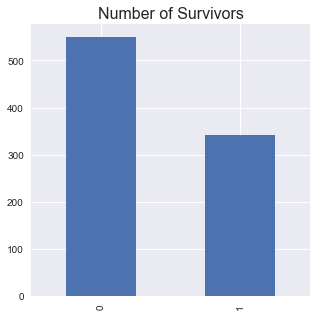

In [83]:
# Survived
plt.figure(figsize=(5,5))
count_survived = train_df["Survived"].value_counts()
count_survived .plot.bar()
plt.title("Number of Survivors", size=16)

Text(0.5, 1.0, 'Number per Class')

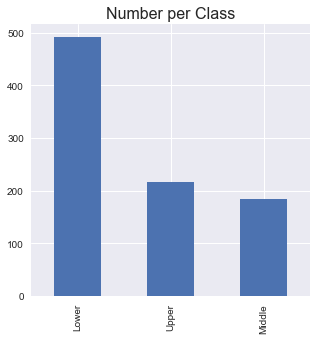

In [84]:
# Number per class
plt.figure(figsize=(5,5))
count_class = train_df["Pclass"].value_counts()
count_class.plot.bar()
plt.title("Number per Class", size=16)

Text(0.5, 1.0, 'Number per Title')

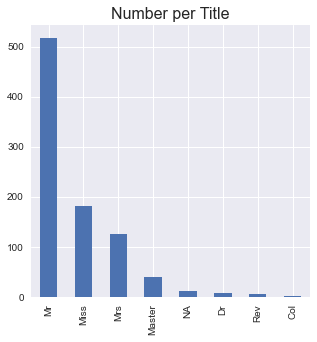

In [85]:
# Number per Title
plt.figure(figsize=(5,5))
count_title = train_df["Title"].value_counts()
count_title.plot.bar()
plt.title("Number per Title", size=16)

Text(0.5, 1.0, 'Number of Siblings or Spouses')

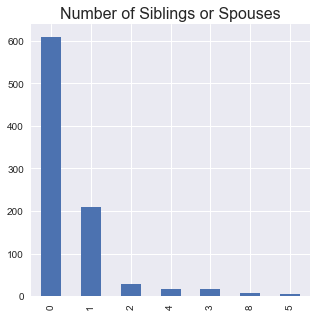

In [86]:
# Number of siblings or spouses
plt.figure(figsize=(5,5))
count_sibsp = train_df["SibSp"].value_counts()
count_sibsp.plot.bar()
plt.title("Number of Siblings or Spouses", size=16)

Text(0.5, 1.0, 'Number per Port')

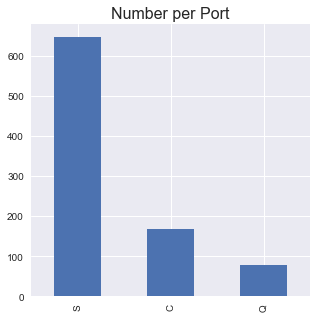

In [87]:
# Number per port
plt.figure(figsize=(5,5))
count_port = train_df["Embarked"].value_counts()
count_port.plot.bar()
plt.title("Number per Port", size=16)

Text(0.5, 1.0, 'Number per Deck')

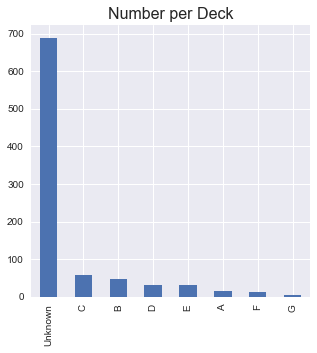

In [88]:
# Number per deck
plt.figure(figsize=(5,5))
count_deck = train_df["Deck"].value_counts()
count_deck.plot.bar()
plt.title("Number per Deck", size=16)

Text(0.5, 1.0, 'Number per with_family')

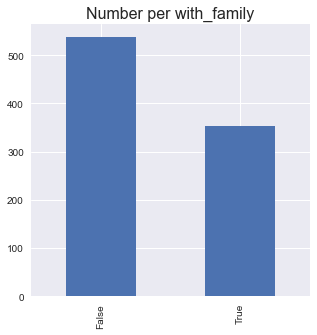

In [89]:
# Number per with_family
plt.figure(figsize=(5,5))
count_with_family = train_df["with_family"].value_counts()
count_with_family.plot.bar()
plt.title("Number per with_family", size=16)

Text(0.5, 1.0, 'Heatmap: Correlation of numeric features')

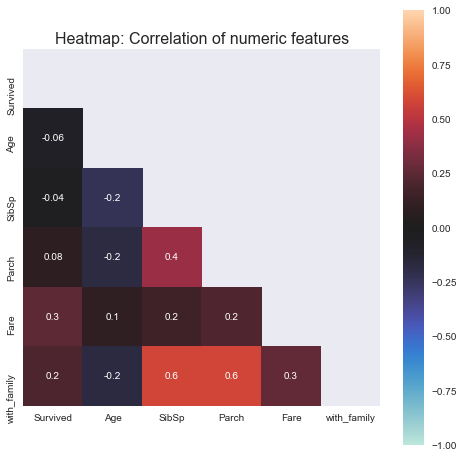

In [90]:
# correlation between all numeric attributes
plt.figure(figsize=(8,8))
matrix = np.triu(train_df.drop(columns=["PassengerId"]).corr())
sns.heatmap(train_df.drop(columns=["PassengerId"]).corr(), annot=True, fmt=".1g", 
            vmin=-1, vmax=1, center=0, 
            cmap="icefire", square=True, mask=matrix)
plt.title("Heatmap: Correlation of numeric features", size=16)

Text(0.5, 0.98, 'Characteristics of Survivors vs Non-Survivors')

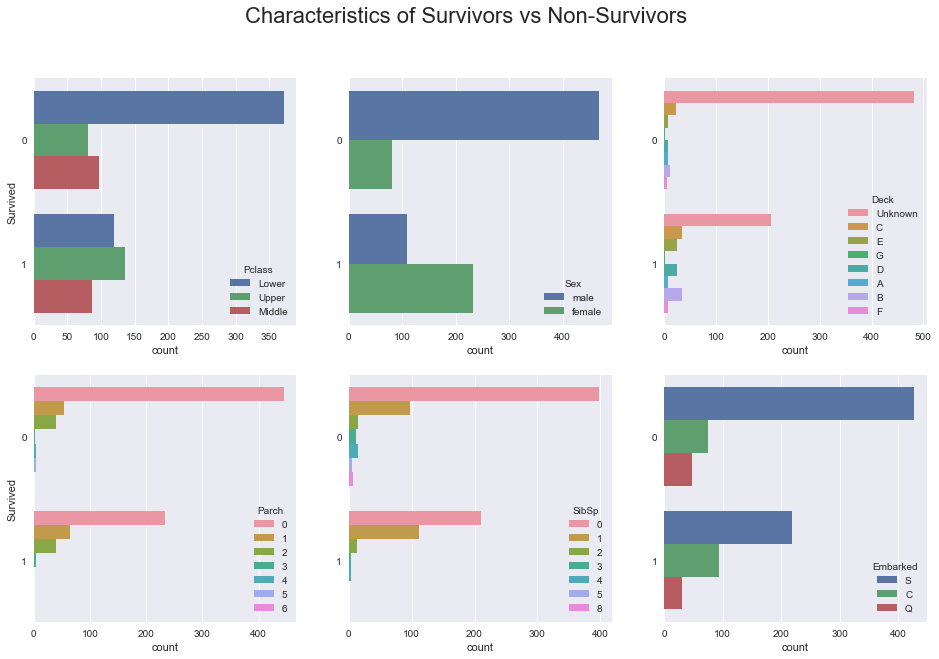

In [91]:
# Survival countplots all in one
fig, axs = plt.subplots(2, 3, figsize=(16,10))
sns.countplot(data=train_df, y="Survived", hue="Pclass", ax=axs.flatten()[0])
axs.flatten()[0].legend(title="Pclass", loc=4)
sns.countplot(data=train_df, y="Survived", hue="Sex", ax=axs.flatten()[1])
axs.flatten()[1].legend(title="Sex", loc=4)
axs.flatten()[1].set_ylabel('') 
sns.countplot(data=train_df, y="Survived", hue="Deck", ax=axs.flatten()[2])
axs.flatten()[2].set_ylabel('') 
axs.flatten()[2].legend(title="Deck", loc=4)
sns.countplot(data=train_df, y="Survived", hue="Parch", ax=axs.flatten()[3])
axs.flatten()[3].legend(title="Parch", loc=4)
sns.countplot(data=train_df, y="Survived", hue="SibSp", ax=axs.flatten()[4])
axs.flatten()[4].set_ylabel('') 
axs.flatten()[4].legend(title="SibSp", loc=4)
sns.countplot(data=train_df, y="Survived", hue="Embarked", ax=axs.flatten()[5])
axs.flatten()[5].set_ylabel('') 
axs.flatten()[5].legend(title="Embarked", loc=4)
fig.suptitle("Characteristics of Survivors vs Non-Survivors", size=22)

<AxesSubplot:xlabel='Age', ylabel='Count'>

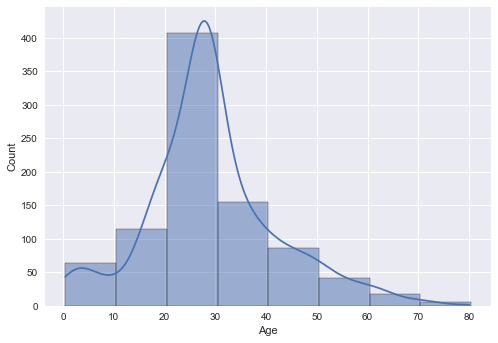

In [92]:
# Age Histogram Training
sns.histplot(data=train_df, x="Age", binwidth=10, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

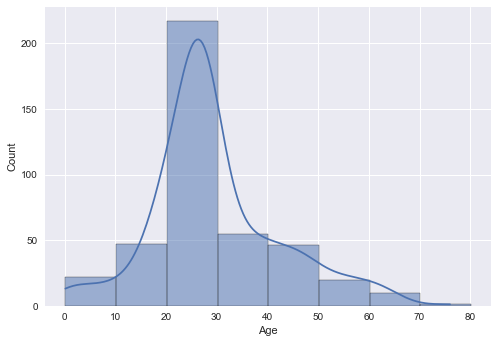

In [93]:
# Age Histogram Test
sns.histplot(data=test_df, x="Age", binwidth=10, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

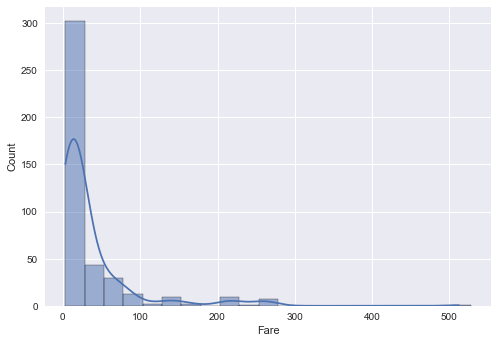

In [95]:
# Fare Histogram Test
sns.histplot(data=test_df, x="Fare", binwidth=25, kde=True)

# 3. Model Training

About the process (to be described)

In [132]:
# check features before training

print(train_df_transformed.columns)
print("\n")
print(test_df_transformed.columns)

Index(['SibSp', 'Parch', 'x0_Lower', 'x0_Middle', 'x0_Upper', 'x1_C', 'x1_Q',
       'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G',
       'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr', 'x4_Master',
       'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev', 'x5_False', 'x5_True',
       'x6_(0, 10]', 'x6_(10, 20]', 'x6_(20, 30]', 'x6_(30, 40]',
       'x6_(40, 50]', 'x6_(50, 60]', 'x6_(60, 70]', 'x6_(70, 80]',
       'x7_(0, 50]', 'x7_(50, 100]', 'x7_(100, 200]', 'x7_(200, 500]',
       'x7_(500, 1000]', 'PassengerId', 'Survived'],
      dtype='object')


Index(['SibSp', 'Parch', 'x0_Lower', 'x0_Middle', 'x0_Upper', 'x1_C', 'x1_Q',
       'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G',
       'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr', 'x4_Master',
       'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev', 'x5_False', 'x5_True',
       'x6_(0, 50]', 'x6_(50, 100]', 'x7_(0, 25]', 'x7_(25, 50]',
       'x7_(50, 100]', 'x7_(100, 150]', 'x7

### 3.1 Logistic Regression

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X_train = train_df_transformed.drop(columns=["PassengerId","Survived"])
y_train = train_df_transformed["Survived"]

X_test = test_df_transformed.drop(columns=["PassengerId"])

#  Logistic regression
lr = LogisticRegression(max_iter=2000)

cv_lr = cross_val_score(lr, X_train, y_train, cv=3)
print(cv_lr)
print("mean accuracy: " + str(cv_lr.mean()))

lr.fit(X_train, y_train)

lr.score(X_train, y_train) # 0.82-0.83

y_test = lr.predict(X_test) # 169

# check number of survivors
print("Number of survivors predicted: " + str(sum(y_test)))

[0.78787879 0.82491582 0.84848485]
mean accuracy: 0.8204264870931538
Number of survivors predicted: 162.0


Text(0.5, 1.0, 'Logistic Regression Model: Regression Coefs')

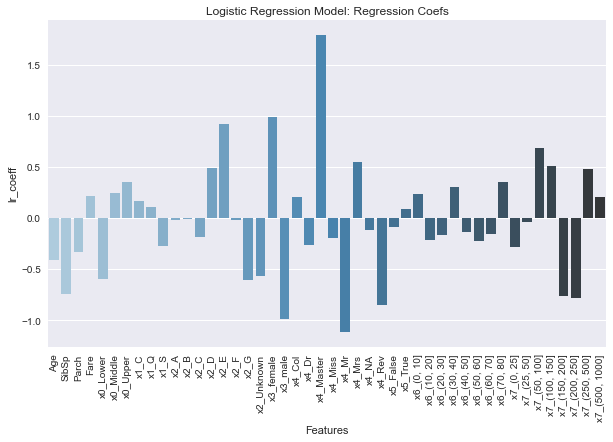

In [98]:
# Feature importance
feature_importance_lr = pd.DataFrame()
feature_importance_lr["Features"] = X_train.columns
feature_importance_lr["lr_coeff"] = np.transpose(lr.coef_)
feature_importance_lr["coef_abs"] = np.transpose(np.abs(lr.coef_))

plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='Features', y='lr_coeff',data=feature_importance_lr, palette="Blues_d")
fg3.set_xticklabels(rotation=90, labels=feature_importance_lr.Features)
plt.title("Logistic Regression Model: Regression Coefs")

In [99]:
# Export for submit (simple model)

export_df = pd.DataFrame()
export_df["PassengerId"] = test_df_transformed["PassengerId"].astype(int)
export_df["Survived"] = y_test.astype(int)
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"log_reg_simple_{name_add}.csv", index=False)

In [115]:
# Tuned model using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X_train = train_df_transformed.drop(columns=["PassengerId","Survived"])
y_train = train_df_transformed["Survived"]

X_test = test_df_transformed.drop(columns=["PassengerId"])

#  Logistic regression
lr = LogisticRegression()

# Find optimal parameter settings using GridSearch
param_grid = {"max_iter" : [500,1000,2000],
              "penalty" : ["l1", "l2"],
              "C" : np.logspace(-4, 4, 20),
              "solver" : ["liblinear"]}
    
lr_clf = GridSearchCV(lr, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

best_lr_clf = lr_clf.fit(X_train, y_train)
print("Best Logistic Regression Score: " + str(best_lr_clf.best_score_))
print("Best Parameter:  " + str(best_lr_clf.best_params_))

# Prediction
y_test = lr_clf.predict(X_test)

# check number of survivors
print("Number of survivors predicted: " + str(sum(y_test))) # 166

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s


Best Logistic Regression Score: 0.819304152637486
Best Parameter:  {'C': 1.623776739188721, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Number of survivors predicted: 163.0


[Parallel(n_jobs=-1)]: Done 337 out of 360 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished


In [101]:
# Export for submit (tuned model)

export_df = pd.DataFrame()
export_df["PassengerId"] = test_df_transformed["PassengerId"].astype(int)
export_df["Survived"] = y_test.astype(int)
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"log_reg_tuned_{name_add}.csv", index=False)

Performance of the **logistic regression** in training and after submission to Kaggle

| Model | mean accuracy training | Kaggle score
|------|------|------|
|   Logistic Regression (simple)  | 0.8215| 0.77272 |
|   Logistic Regression (tuned)  | 0.8294| 0.77033 |

Performance will be evaluated further later as well as compared to other models using more than just accuracy.

### 3.2 Random Forest Classifier

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train = train_df_transformed.drop(columns=["PassengerId","Survived"])
y_train = train_df_transformed["Survived"]

X_test = test_df_transformed.drop(columns=["PassengerId"])

# Random forrest classifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

cv_rnd_clf = cross_val_score(rnd_clf, X_train, y_train, cv=5)
print(cv_rnd_clf)
print("mean accuracy: " + str(cv_rnd_clf.mean()))

rnd_clf.fit(X_train, y_train)

rnd_clf.score(X_train, y_train) # 0.8092

y_test = rnd_clf.predict(X_test)

# check number of survivors
print("Number of survivors predicted: " + str(sum(y_test))) # 162

[0.7877095  0.7752809  0.85393258 0.76966292 0.85955056]
mean accuracy: 0.8092272926997678
Number of survivors predicted: 162.0


<AxesSubplot:>

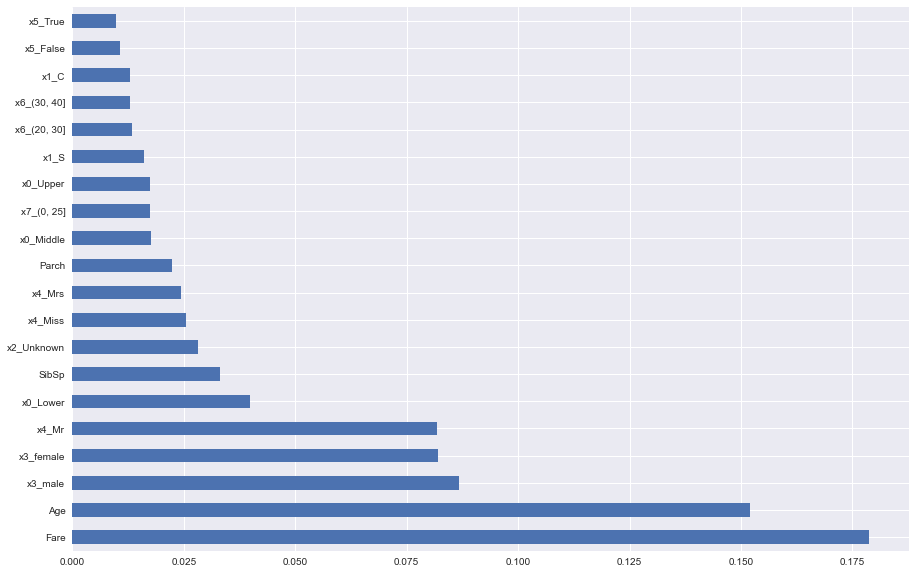

In [105]:
# Feature Importance
plt.figure().set_size_inches(15, 10)
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [106]:
# Export for submit (simple model)

export_df = pd.DataFrame()
export_df["PassengerId"] = test_df_transformed["PassengerId"].astype(int)
export_df["Survived"] = y_test.astype(int)
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"random_forest_simple_{name_add}.csv", index=False)

In [140]:
# Random Forest tuned

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train = train_df_transformed.drop(columns=["PassengerId","Survived"])
y_train = train_df_transformed["Survived"]

X_test = test_df_transformed.drop(columns=["PassengerId"])

# Random forrest classifier
rf = RandomForestClassifier()

# Find optimal parameter settings using Randomized Search
param_grid =  {'n_estimators': [200,300,400,600,800,1000,1500], 
               'bootstrap': [True,False],
               'max_depth': [3,5,10,20,50,75,100,None],
               'max_features': ['auto'],
               'min_samples_leaf': [1,2,4,6,10],
               'min_samples_split': [2,5,10,20]}

rnd_clf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=500, cv=3, verbose=True, n_jobs=-1)

best_rnd_clf = rnd_clf.fit(X_train, y_train)
print("Best Random Forest Score: " + str(best_rnd_clf .best_score_))
print("Best Parameter:  " + str(best_rnd_clf .best_params_))

best_rnd_clf.score(X_train, y_train) # 0.8361

# Prediction
y_test = best_rnd_clf.predict(X_test)

# check number of survivors
print("Number of survivors predicted: " + str(sum(y_test))) # 159

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.6min finished


Best Random Forest Score: 0.8271604938271606
Best Parameter:  {'n_estimators': 600, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Number of survivors predicted: 155.0


<AxesSubplot:>

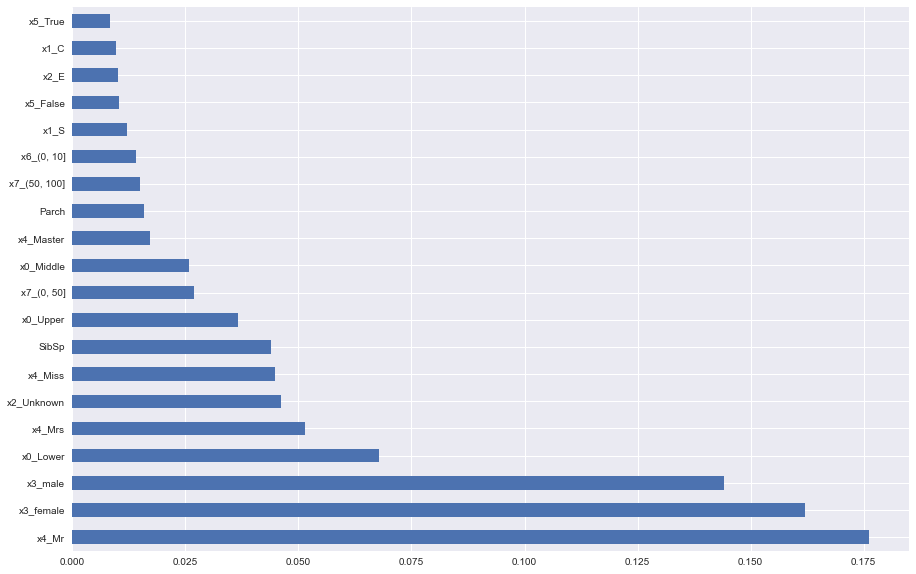

In [141]:
# Feature Importance
plt.figure().set_size_inches(15, 10)
best_rf = best_rnd_clf.best_estimator_.fit(X_train, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [142]:
# Export for submit (tuned model)

export_df = pd.DataFrame()
export_df["PassengerId"] = test_df_transformed["PassengerId"].astype(int)
export_df["Survived"] = y_test.astype(int)
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"random_forest_tuned_{name_add}.csv", index=False)

Performance of the **random forest classifier** in training and after submission to Kaggle

| Model | mean accuracy training | Kaggle score
|------|------|------|
|   Random Forest (simple)  | 0.8092| 0.xxxx |
|   Random Forest (tuned)  | 0.8361| 0.79425 |

Performance will be evaluated further later as well as compared to other models using more than just accuracy.

### 3.3 XGBoost

In [48]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

X_train = train_df_transformed.drop(columns=["PassengerId","Survived"])
y_train = train_df_transformed["Survived"]

X_test = test_df_transformed.drop(columns=["PassengerId"])

# rename columns because of XGBoost error otherwise
# ValueError: feature_names must be string, and may not contain [, ] or <

X_train.columns = ['Age', 'SibSp', 'Parch', 'Fare', 'x0_Lower', 'x0_Middle', 'x0_Upper',
       'x1_C', 'x1_Q', 'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F',
       'x2_G', 'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr',
       'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev',
       'x5_False', 'x5_True', 'x6_0_10', 'x6_10_20', 'x6_20_30',
       'x6_30_40', 'x6_40_50', 'x6_50_60', 'x6_60_70',
       'x6_70_80']

y_train.columns = ['Age', 'SibSp', 'Parch', 'Fare', 'x0_Lower', 'x0_Middle', 'x0_Upper',
       'x1_C', 'x1_Q', 'x1_S', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F',
       'x2_G', 'x2_Unknown', 'x3_female', 'x3_male', 'x4_Col', 'x4_Dr',
       'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_NA', 'x4_Rev',
       'x5_False', 'x5_True', 'x6_0_10', 'x6_10_20', 'x6_20_30',
       'x6_30_40', 'x6_40_50', 'x6_50_60', 'x6_60_70',
       'x6_70_80']

# xgboost classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

cv_xgb_clf = cross_val_score(xgb_clf, X_train, y_train, cv=5)
print(cv_xgb_clf)
print("mean accuracy: " + str(cv_xgb_clf.mean()))

xgb_clf.fit(X_train, y_train)

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Confusion Matrix
y_train_pred = xgb_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))

In [ ]:

# Final Prediction
y_test = best_rnd_clf.predict(X_test)

# check number of survivors
print("Number of survivors predicted: " + str(sum(y_test))) # 152